<a href="https://colab.research.google.com/github/RaminTKhameneh/AAI695HWs/blob/main/Homework_2_Ramin_khameneh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.loadtxt('drive/MyDrive/695HW/data2.txt', dtype=float,delimiter=",")

In [ ]:
train_data = data[:int(0.8 * len(data))]
test_data = data[int(0.8 * len(data)):]

# 1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column)

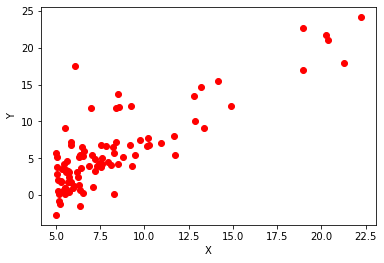

In [ ]:
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data[:,0],data[:,1],'ro') 


# 2) Normal equation to find the coefficients:

In [ ]:
# Normal Equation
X = np.hstack((np.ones((train_data.shape[0],1)), train_data[:,0].reshape(-1,1)))
y = train_data[:,1].reshape(-1,1)
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("w0 =",w[0][0],'w1 =', w[1][0])
Xt = np.hstack((np.ones((test_data.shape[0],1)), test_data[:,0].reshape(-1,1)))
yt = test_data[:,1].reshape(-1,1)

w0 = -3.639639254766454 w1 = 1.1936757464879815


# 3) Gradient Descent using batch AND stochastic modes respectively:

In [ ]:
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def gradient(X, y, w):
    grad = X.T.dot(X.dot(w) - y) / len(y)
    return grad

def batch_gradient_descent (X, y, Xt, yt, LR, N):
    w = np.array([[0],[0]]) 
    train_losses = []   
    test_losses = []
    for i in range(N):
      grad = gradient(X, y, w)
      train_loss = mse_loss(X.dot(w), y)
      test_loss = mse_loss(Xt.dot(w), yt)
      train_losses.append(train_loss)
      test_losses.append(test_loss)
      w = w - LR * grad
    return w, train_losses, test_losses

def stochastic_gradient_descent(X, y, LR, N):
    w = np.array([[0],[0]]) 
    train_losses = []   
    test_losses = []  
    for i in range(N):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for j in indices:
            x_j = np.array([X[j]])
            y_j = np.array([y[j]])
            
            grad = gradient(x_j, y_j, w)
            w = w - LR * grad
    return w

Gradient Descent using batch:

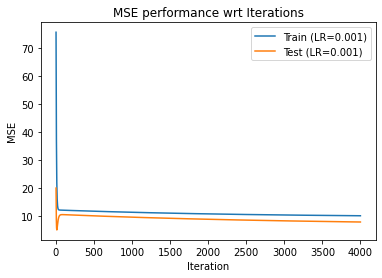

for learning rate =  0.001 w0 = -1.8991964045569243 w1 = 1.0270562395990743



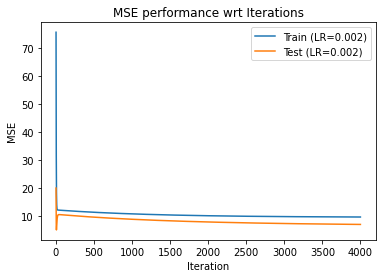

for learning rate =  0.002 w0 = -2.8254325424359745 w1 = 1.1157285039813913



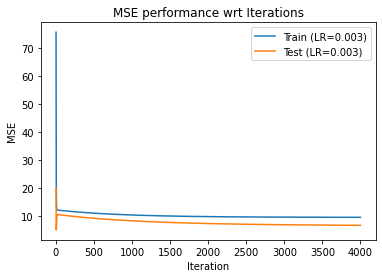

for learning rate =  0.003 w0 = -3.2587954298508803 w1 = 1.1572160544610475



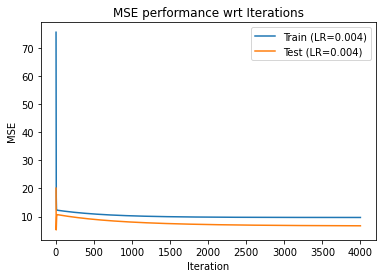

for learning rate =  0.004 w0 = -3.461525908491814 w1 = 1.176624248403433



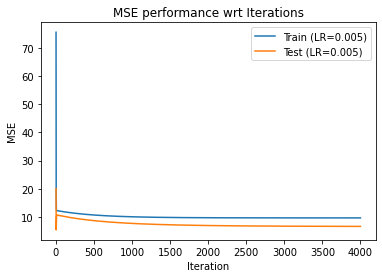

for learning rate =  0.005 w0 = -3.5563510907508262 w1 = 1.1857022397357797



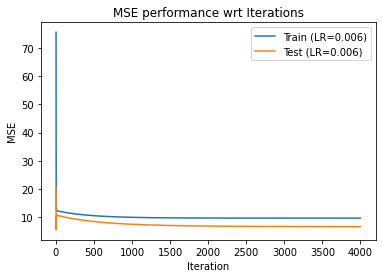

for learning rate =  0.006 w0 = -3.6006982304050505 w1 = 1.1899477675566048



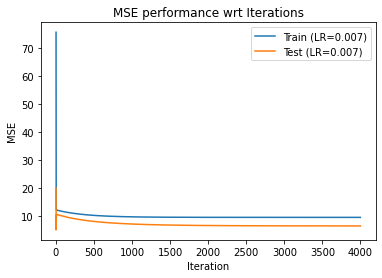

for learning rate =  0.007 w0 = -3.621435176756185 w1 = 1.191932997795559



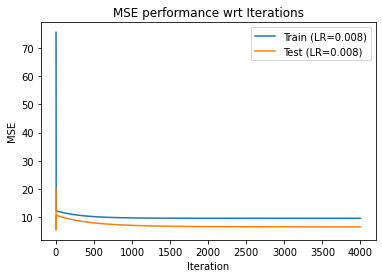

for learning rate =  0.008 w0 = -3.631130476356554 w1 = 1.1928611673349145



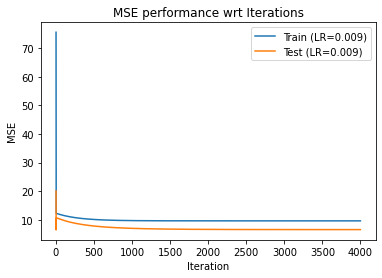

for learning rate =  0.009 w0 = -3.6356627370195675 w1 = 1.1932950586498017



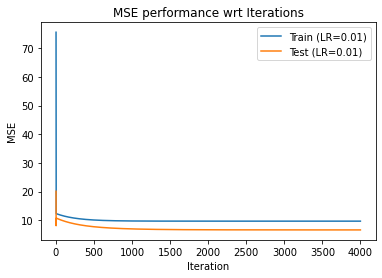

for learning rate =  0.01 w0 = -3.6377811260377553 w1 = 1.1934978604445097



In [ ]:
N = 4000
rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
for LR in rates:
    w, train_losses, test_losses = batch_gradient_descent(X, y, Xt, yt, LR, N)
    plt.plot(range(1, N + 1), train_losses, label=f"Train (LR={LR})")
    plt.plot(range(1, N + 1), test_losses, label=f"Test (LR={LR})")
    plt.title("MSE performance wrt Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    plt.legend()
    plt.show(LR)
    print('for learning rate = ',LR,"w0 =",w[0][0],"w1 =",w[1][0])
    print()

Gradient Descent using stochastic method with one random sample:

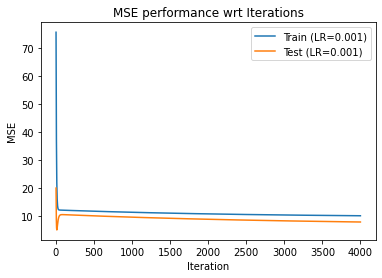

0.001 w0 = -1.8991964045569243 w1 = 1.0270562395990743



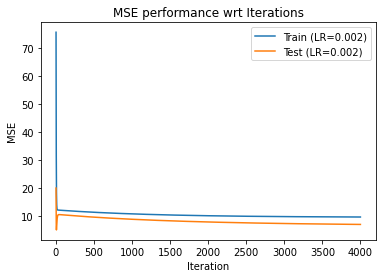

0.002 w0 = -2.8254325424359745 w1 = 1.1157285039813913



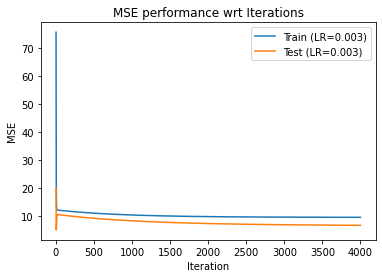

0.003 w0 = -3.2587954298508803 w1 = 1.1572160544610475



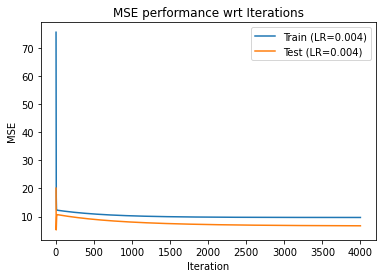

0.004 w0 = -3.461525908491814 w1 = 1.176624248403433



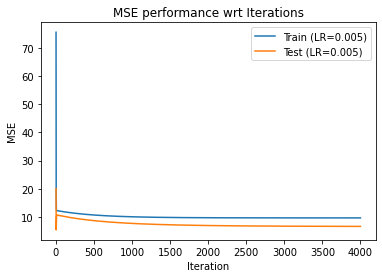

0.005 w0 = -3.5563510907508262 w1 = 1.1857022397357797



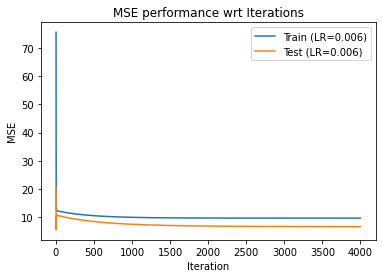

0.006 w0 = -3.6006982304050505 w1 = 1.1899477675566048



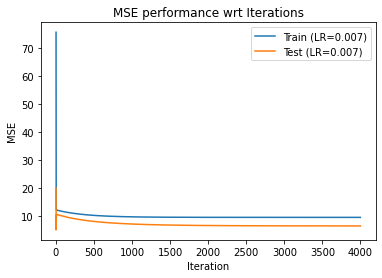

0.007 w0 = -3.621435176756185 w1 = 1.191932997795559



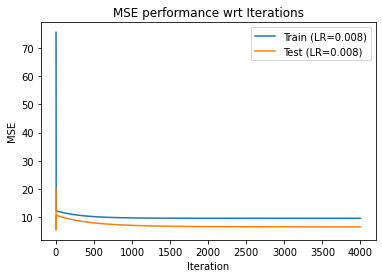

0.008 w0 = -3.631130476356554 w1 = 1.1928611673349145



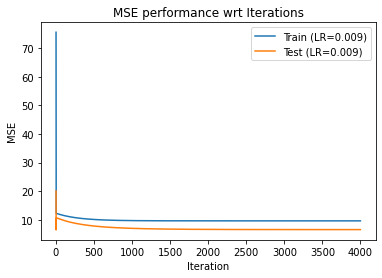

0.009 w0 = -3.6356627370195675 w1 = 1.1932950586498017



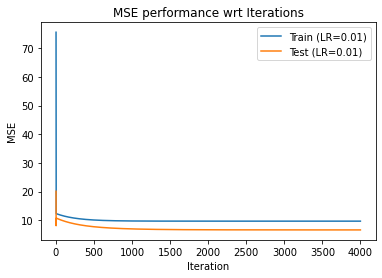

0.01 w0 = -3.6377811260377553 w1 = 1.1934978604445097



In [ ]:
N = 4000
rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
for LR in rates:
    w, train_losses, test_losses = batch_gradient_descent(X, y, Xt, yt, LR, N)
    plt.plot(range(1, N + 1), train_losses, label=f"Train (LR={LR})")
    plt.plot(range(1, N + 1), test_losses, label=f"Test (LR={LR})")
    plt.title("MSE performance wrt Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    plt.legend()
    plt.show(LR)
    print(LR,"w0 =",w[0][0],"w1 =",w[1][0])
    print()

# Disscussion:

When comparing the accuracy of the testing set and speed of convergence of the batch and stochastic modes of Gradient Descent for the linear regression model with a termination condition after 4000 iterations, we find that both modes can converge fast to an optimal solution, but with some differences. First, when increasing the learning rate in 4000 iterations, compared to the normal equation as a reference, I find that the batch mode could converge faster than the stochastic mode, and the accuracy of the coefficients is higher for the same number of iterations. This is because the batch mode updates all the model parameters by computing the gradients over the entire training dataset, which leads to a more accurate estimate of the gradients and a more precise update of the parameters. But, the stochastic mode updates the parameters by computing the gradients over a single training sample, which could lead to a noisy estimate of the gradients and a slower convergence. 

In addition,MSE for the test and train data converges very fast for all learning rates in both modes of Gradient Descent, which makes it difficult to observe differences in plots. However, it is apparent that the MSE converges faster for higher learning rates.
The slower stochastic mode convergence is because of randomness of selection of traning samples, which could lead to a noisier estimate of the gradients compared to the batch mode. 

Furthumore, in some cases, with increasing the learning rate in the stochastic mode, the accuracy decreases. This is a side effect of using the stochastic mode, and it is in the nature of any stochastic process, where random variations could lead to a significant better solutions but this is rare and it is not reliable. The acceptable levels MSE for the training and testing sets could vary depending on the problem and the data at hand. Therefore, it is important to consider the specific problem and the available data when interpreting the MSE levels and assessing the accuracy of the model. But the results shows a convergence in MSE for both test and train data for both stochastic and batch methods.